# <span style="font-family:Georgia; text-align:center;">Sistema con dos masas y tres resortes</span> 
<span style="font-family:Georgia;">

Considera un sistema físico compuesto por *2 masas* ($m_1$ y $m_2$) y *3 resortes* con constantes elásticas $k_1$, $k_2$ y $k_3$. La configuración es la siguiente:
- El primer resorte (constante $k_1$) conecta la pared con la masa $m_1$.
- El segundo resorte (constante $k_2$) conecta la masa $m_1$ con la masa $m_2$.
- El tercer resorte (constante $k_3$) conecta la masa $m_2$ con la pared opuesta.

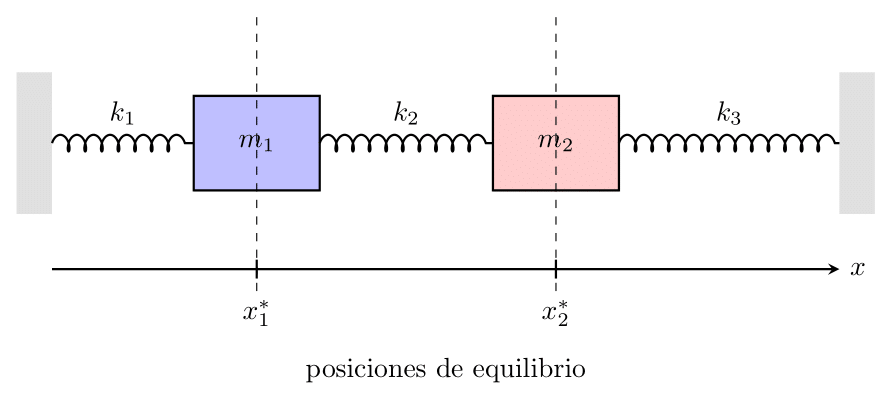

<span style="font-family:Georgia;">

Supón que cada masa se puede desplazar en una sola dimensión (por ejemplo, a lo largo de un riel horizontal). Sea $x_1(t)$ la posición (o desplazamiento respecto a un punto de equilibrio) de la masa $m_1$ en el tiempo $t$, y $x_2(t)$ la de la masa $m_2$.

**a)** Escribe las ecuaciones de movimiento para cada masa, aplicando la ley de Hooke y la segunda ley de Newton. En particular, las fuerzas inerciales resultado de la suma de las fuerzas ejercidas por cada resorte vienen dadas por  
$$F_1 = m_1\,x_1''(t), \qquad F_2 = m_2\,x_2''(t).$$

Sagun las siguientes descripciones identifica las fuerzas en el diagrama de masas y resortes Dibujalas sobre la imagen `diagrama2masas3resortes.png`:
- **El resorte 1**, que conecta la pared con la masa $m_1$, ejerce una fuerza proporcional al desplazamiento de la masa respecto a su posición de equilibrio: $$-k_1\,x_1(t).$$
- **El resorte 2**, que conecta las dos masas, ejerce sobre $m_1$ una fuerza proporcional a $x_2(t)-x_1(t)$, es decir,  $$k_2(x_2(t)-x_1(t)).$$ La misma fuerza, pero con signo opuesto, actúa sobre $m_2$:  
  $$k_2(x_1(t)-x_2(t)).$$
- **El resorte 3**, que conecta la masa $m_2$ con la pared, ejerce una fuerza proporcional a su desplazamiento:  
  $$-k_3\,x_2(t).$$

**b)** Define variables auxiliares $v_1=x_1'$ y $v_2=x_2'$ para reescribir el sistema de ecuaciones de segundo orden como un **sistema de 4 ecuaciones de primer orden**. Escríbelo en la forma matricial
$$
X' = A\,X, \qquad
X = \begin{pmatrix} x_1 \\ v_1 \\ x_2 \\ v_2 \end{pmatrix}.
$$

**c)** Si asumimos que $k_1=k_3=k>0$ y $m_1=m_2=m>0$, las ecuaciones de movimiento están dadas por
$$
m\,x_1''=-(k+k_2)\,x_1+k\,x_2, \qquad
m\,x_2''=k_2\,x_1-(k+k_2)\,x_2.
$$
Transforma este sistema de ecuaciones diferenciales en una **ecuación diferencial ordinaria de segundo orden** de la forma
$$
y''=-C\,y, \qquad C>0.
$$
*Pista:* considera la **suma** (o la **resta**) del sistema de ecuaciones.

**d)** Transforma la ecuación de segundo orden anterior en un sistema de primer orden de la forma
$$
\begin{pmatrix} y' \\ v' \end{pmatrix}
=
\begin{pmatrix} 0 & 1 \\ -C & 0 \end{pmatrix}
\begin{pmatrix} y \\ v \end{pmatrix}.
$$
**e)** Argumenta por qué ese sistema tiene a la **solución de equilibrio** como un **centro** y da sus **soluciones explícitas**.

**f)** Expresa las soluciones $x_1$ y $x_2$ del problema descrito en **c)** en términos de $y$ dando una **expresión explícita**.  
*Hint:* Observa que
$$
x_1=\tfrac12\big[(x_1+x_2)+(x_1-x_2)\big],\qquad
x_2=\tfrac12\big[(x_1+x_2)-(x_1-x_2)\big].
$$

**g)** Grafica las soluciones e **interpreta** el movimiento de las masas respecto al tiempo.


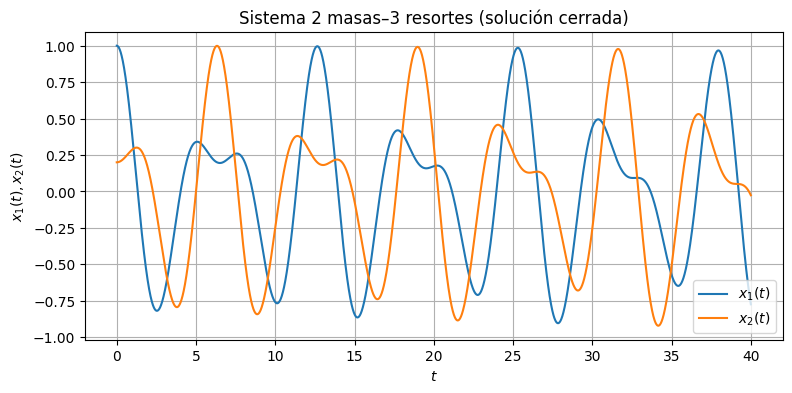

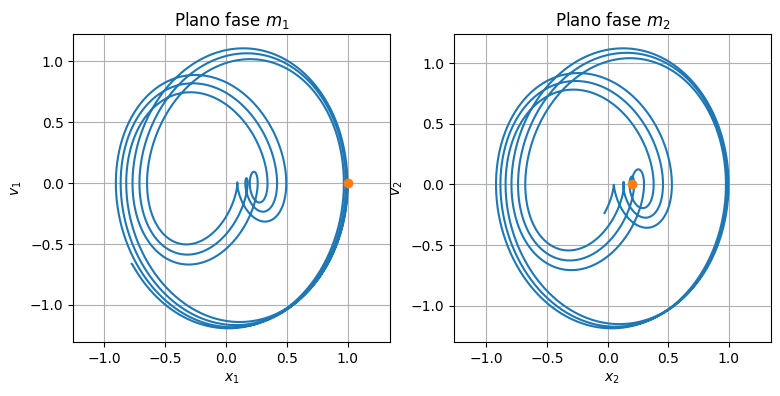

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros (ejemplo)
m = 1.0
k = 1.0
k2 = 0.6
w_plus = np.sqrt(k/m)
w_minus = np.sqrt((k+2*k2)/m)

# Condiciones iniciales
a1, a2 = 1.0, 0.2
b1, b2 = 0.0, 0.0

# y+(0), y-(0) y sus derivadas iniciales
y0_plus  = a1 + a2
y0_minus = a1 - a2
v0_plus  = b1 + b2
v0_minus = b1 - b2

# Soluciones cerradas
def y_plus(t):
    return y0_plus*np.cos(w_plus*t) + (v0_plus/w_plus)*np.sin(w_plus*t)

def y_minus(t):
    return y0_minus*np.cos(w_minus*t) + (v0_minus/w_minus)*np.sin(w_minus*t)

def x1(t): return 0.5*(y_plus(t) + y_minus(t))
def x2(t): return 0.5*(y_plus(t) - y_minus(t))

# Mallado temporal y gráficas
t = np.linspace(0, 40, 4000)
X1, X2 = x1(t), x2(t)

plt.figure(figsize=(9,4))
plt.plot(t, X1, label="$x_1(t)$")
plt.plot(t, X2, label="$x_2(t)$")
plt.title("Sistema 2 masas–3 resortes (solución cerrada)")
plt.xlabel("$t$")
plt.ylabel("$x_1(t), x_2(t)$")
plt.grid(True); plt.legend(); plt.show()

# Plano fase de cada masa
V1 = np.gradient(X1, t); V2 = np.gradient(X2, t)

fig, ax = plt.subplots(1,2, figsize=(9,4))
ax[0].plot(X1, V1); ax[0].plot([a1],[b1],"o"); ax[0].set_title("Plano fase $m_1$")
ax[0].set_xlabel("$x_1$"); ax[0].set_ylabel("$v_1$"); ax[0].grid(True); ax[0].axis("equal")

ax[1].plot(X2, V2); ax[1].plot([a2],[b2],"o"); ax[1].set_title("Plano fase $m_2$")
ax[1].set_xlabel("$x_2$"); ax[1].set_ylabel("$v_2$"); ax[1].grid(True); ax[1].axis("equal")
plt.show()


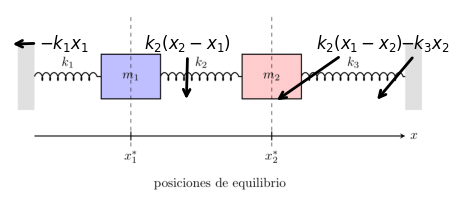

In [36]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("imgs/diagrama2masas3resortes.png")
fig, ax = plt.subplots(figsize=(8,2.5))
ax.imshow(img)
ax.axis("off")

# Anotaciones en coordenadas relativas del eje [0,1]x[0,1] (ajusta si hace falta)
kw = dict(arrowprops=dict(arrowstyle="->", lw=2), fontsize=12)

# Fuerzas en m1
ax.annotate(r"$-k_1 x_1$", xy=(0.0,0.82), xytext=(0.07,0.80), xycoords="axes fraction", **kw)
ax.annotate(r"$k_2(x_2-x_1)$", xy=(0.42,0.52), xytext=(0.32,0.80), xycoords="axes fraction", **kw)

# Fuerzas en m2
ax.annotate(r"$k_2(x_1-x_2)$", xy=(0.63,0.52), xytext=(0.73,0.80), xycoords="axes fraction", **kw)
ax.annotate(r"$-k_3 x_2$", xy=(0.87,0.52), xytext=(0.93,0.80), xycoords="axes fraction", **kw)

plt.show()
